In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import font_manager as fm
from pathlib import Path

In [3]:
base_dir = Path("D:/APMC-price-predictor")
font_path = base_dir / "NotoSerifGujarati-Black.ttf"
guj_fonts = fm.FontProperties(fname=font_path)

In [4]:
file_path = base_dir / "data/commodities/temp.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Display the first few rows to confirm the structure
print("Dataset preview:")
print(data.head())

Dataset preview:
                Item Name  Low Price  Average Price  High Price
Date                                                           
04-09-2024   કપાસ બી. ટી.       1051           1621        1661
04-09-2024      ઘઉં લોકવન        540            580         598
04-09-2024      ઘઉં ટુકડા        540            560         662
04-09-2024     મગફળી જીણી        871           1141        1256
04-09-2024  સિંગદાણા જાડા       1101           1511        1621


In [5]:
commodities = data['Item Name'].unique()
print(commodities)
print(commodities.shape)

['કપાસ બી. ટી.' 'ઘઉં લોકવન' 'ઘઉં ટુકડા' 'મગફળી જીણી' 'સિંગદાણા જાડા'
 'સિંગ ફાડીયા' 'એરંડા / એરંડી' 'જીરૂ' 'ક્લંજી' 'વરીયાળી' 'ધાણા'
 'લસણ સુકું' 'ડુંગળી લાલ' 'અડદ' 'તુવેર' 'રાયડો' 'રાય' 'મેથી' 'કાંગ'
 'કારીજીરી' 'સુરજમુખી' 'ગુવાર બી' 'મગફળી જાડી' 'સફેદ ચણા' 'મગફળી નવી'
 'તલ - તલી' 'ધાણી' 'બાજરો' 'જુવાર' 'મકાઇ' 'મગ' 'ચણા' 'વાલ' 'વાલ પાપડી'
 'ચોળા / ચોળી' 'સોયાબીન' 'અજમાં' 'ગોગળી' 'વટાણા' 'તલ કાળા' 'મઠ' 'ઇસબગુલ'
 'રાજગરો' 'તલ લાલ' 'કપાસ નવો' 'સુવાદાણા' 'મગફળી 66' 'અરીઠા' 'કળથી'
 'મરચા સૂકા પટ્ટો' 'મરચા' 'ડુંગળી સફેદ' 'નવા ધાણા']
(53,)


In [24]:
# commodities = ['મગફળી 66']
# print(commodities)

['મગફળી 66']


In [6]:
import os

save_dir = base_dir / "models/commodities_saved_models"
os.makedirs(save_dir, exist_ok=True)

In [7]:
# Step 1: Stationarity Check
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print("\nADF Test Results:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("The series is stationary (no further differencing needed).")
        return True
    else:
        print("The series is not stationary (differencing is required).")
        return False


In [8]:
# Function to count significant lags
def count_significant_spikes(values, confint):
    # The significant lags are those outside the confidence interval
    significant_lags = np.where(np.abs(values) > confint[:, 1])[0]
    return len(significant_lags), significant_lags

In [8]:
pip install joblib

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import os
import joblib
import hashlib

# Function to generate a safe file name
def safe_filename(product_name):
    return hashlib.md5(product_name.encode('utf-8')).hexdigest()

# To create models of All Products

મગફળી 66 size:  27
Checking stationarity for the raw price data of મગફળી 66:

ADF Test Results:
ADF Statistic: -0.7995
p-value: 0.8193
Critical Value 1%: -3.8591
Critical Value 5%: -3.0420
Critical Value 10%: -2.6609
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -2.0027
p-value: 0.2854
Critical Value 1%: -3.9240
Critical Value 5%: -3.0685
Critical Value 10%: -2.6739
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -1.9187
p-value: 0.3233
Critical Value 1%: -3.8591
Critical Value 5%: -3.0420
Critical Value 10%: -2.6609
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -1.1586
p-value: 0.6912
Critical Value 1%: -3.9644
Critical Value 5%: -3.0849
Critical Value 10%: -2.6818
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -0.4070
p-value: 0.9089
Critical Value 1%: -4.0689
Critical Value 5%: -3.1271
Critical Value 10%: -2.

<Figure size 1200x600 with 0 Axes>

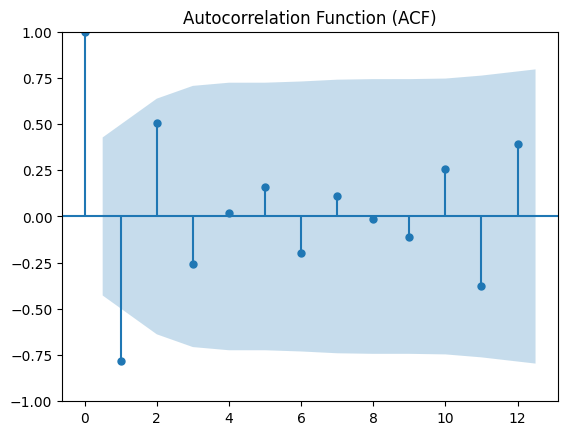

Can't plot the acf/pacf plots for મગફળી 66 due to Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 12 must be < 10.

Fitting ARIMA model for મગફળી 66 with order (5, 1, 1)...

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          Average Price   No. Observations:                   27
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -159.681
Date:                Tue, 04 Feb 2025   AIC                            333.362
Time:                        15:55:06   BIC                            342.168
Sample:                             0   HQIC                           335.898
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

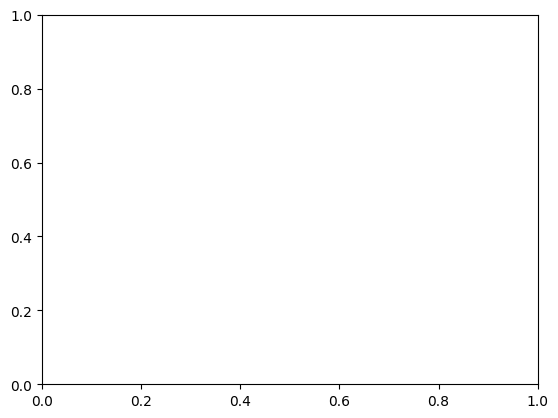

In [25]:
models = {}

for product in commodities:
    
    commodity_name = product 
    commodity_data = data[data['Item Name'] == commodity_name]
    size_commodity_data = commodity_data.shape[0]
    print(commodity_name, "size: ", size_commodity_data)
    
    if((size_commodity_data//2)-1 <= 0):
        continue
    
    # Check if any data exists for the selected commodity
    if commodity_data.empty:
        print(f"No data found for the commodity: {commodity_name}")

    else:
        # Extract the 'Average Price' column for the selected commodity
        price_data = commodity_data['Average Price']
        # price_data.index = pd.to_datetime(price_data.index, format='%d-%m-%Y')
        # Get the last date in the dataset
        # latest_date = price_data.index.max()
        #print(latest_date)

        # Calculate the start date for the last 3 months
        # three_months_ago = latest_date - pd.DateOffset(months=3)
        #print(three_months_ago)

        # Filter the data for plotting
        # filtered_data = price_data[price_data.index >= three_months_ago]
        #print(filtered_data)


        # Plot the raw price data for the selected commodity
        # plt.figure(figsize=(12, 6))
        # plt.plot(price_data.index, price_data, label=f'{commodity_name} Prices', marker='o', linestyle='-')
        # plt.title(f'Price Trend for {commodity_name}')
        # plt.xlabel('Date')
        # plt.ylabel('Average Price')
        # plt.xticks(rotation=90)
        # plt.legend()
        # plt.grid()
        # plt.tight_layout()
        # plt.show()
        

    # Step 2: Differencing (if necessary)
    print(f"Checking stationarity for the raw price data of {commodity_name}:")
    d = 0
    price_diff = price_data
    while True:
        if check_stationarity(price_diff):
            # price_diff = price_data
            print(f"Data is stationary with d={d}.")
            break
        else:
            price_diff = price_diff.diff().dropna()
            d += 1
    # if check_stationarity(price_data):
    #   price_diff = price_data
    # else:
    #   price_diff = price_data.diff().dropna()  # Apply differencing to make the series stationary

    print("\nChecking stationarity for the differenced data:")
    check_stationarity(price_diff)
    # print(d)

    # filtered_price_diff = price_diff[price_diff.index >= three_months_ago]  # For differenced data

    # Plot the differenced data
    # plt.figure(figsize=(12, 6))
    # plt.plot(price_diff, label='Differenced Data', marker='o', linestyle='-')
    # plt.title('Differenced Data')
    # plt.xlabel('Date')
    # plt.ylabel('Price Difference')
    # plt.xticks(rotation=90)
    # plt.legend()
    # plt.grid()
    # plt.show()
    
    
    # Step 3: Plot ACF and PACF

    acf_values, acf_confint = acf(price_diff, alpha=0.05)
    pacf_values, pacf_confint = pacf(price_diff, alpha=0.05)


    # Count significant spikes for ACF (q)
    q, significant_acf_lags = count_significant_spikes(acf_values, acf_confint)

    # Count significant spikes for PACF (p)
    p, significant_pacf_lags = count_significant_spikes(pacf_values, pacf_confint)

    print(f"Significant spikes in ACF (q): {q} at lags {significant_acf_lags}")
    print(f"Significant spikes in PACF (p): {p} at lags {significant_pacf_lags}")

    # ACF and PACF Plots
    try:
        plt.figure(figsize=(12, 6))
        plot_acf(price_diff, lags=(size_commodity_data//2)-1, title="Autocorrelation Function (ACF)")
        plt.show()

        plt.figure(figsize=(12, 6))
        plot_pacf(price_diff, lags=(size_commodity_data//2)-1, title="Partial Autocorrelation Function (PACF)")
        plt.show()
    
    except Exception as e:
        print(f"Can't plot the acf/pacf plots for {commodity_name} due to {e}")

    # Explanation:
    # - ACF (Autocorrelation Function): Measures the correlation between a series and its lagged values.
    # - PACF (Partial Autocorrelation Function): Measures the correlation between a series and its lagged values,
    #   removing the influence of intermediate lags.
    # - Use these plots to decide on p (AR term) and q (MA term).
    
    if p > 15:
        p = min(5, q)
    if q > 15: 
        q = min(5, p)
    if d > 5:
        d = 1

    # Choose p, d, q based on ACF and PACF (example values)
    # p, d, q = 5, 0, 2  # Adjust based on ACF/PACF analysis
    print(f"\nFitting ARIMA model for {commodity_name} with order ({p}, {d}, {q})...")
    model = ARIMA(price_data, order=(p,d,q))
    model_fit = model.fit()
    
    
    # Step 5: Analyze Model Summary
    print("\nARIMA Model Summary:")
    print(model_fit.summary())
    
    
    try:
        # Assume model_fit is the fitted ARIMA model for this product
        hashed_name = safe_filename(product)
        model_filename = os.path.join(save_dir, f"arima_model_{hashed_name}.pkl")
        joblib.dump(model_fit, model_filename)
        print(f"Model for {product} saved as {model_filename}")
    except Exception as e:
        print(f"Error saving model for {product}: {e}")


In [13]:
print(safe_filename('મગફળી 66'))

aba3d067395c6cad9ed5992a9e8dc05d


In [14]:
print(safe_filename("કપાસ બી. ટી."))

bc5d04b4f2d950f2417a01a7667c612f


27


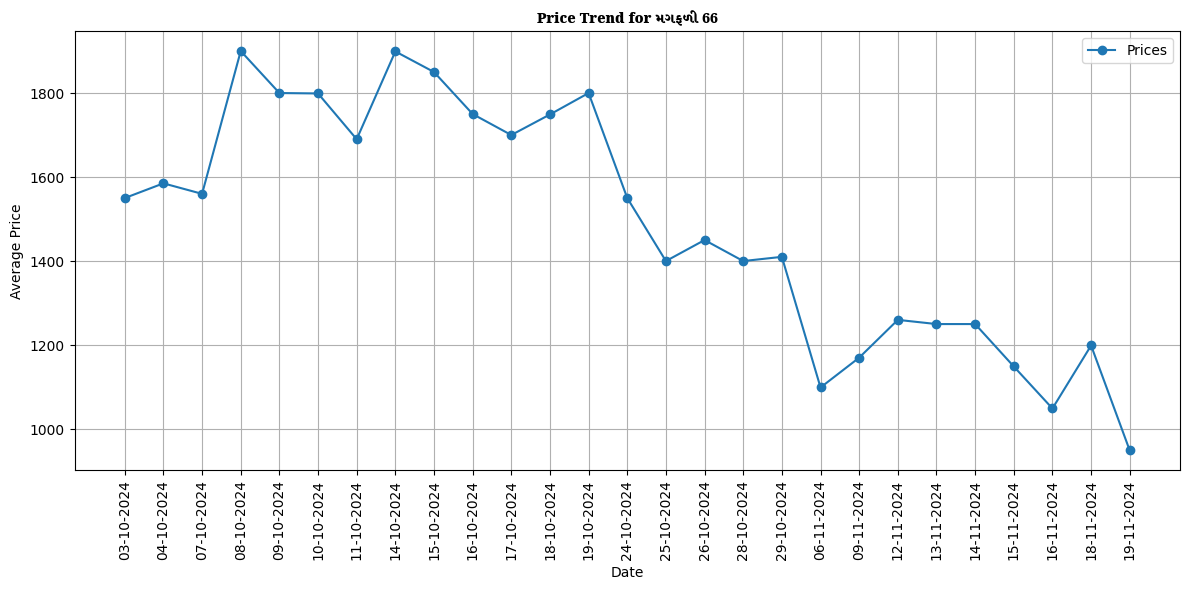

Model for મગફળી 66 loaded successfully.
                               SARIMAX Results                                
Dep. Variable:          Average Price   No. Observations:                   27
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -159.681
Date:                Tue, 04 Feb 2025   AIC                            333.362
Time:                        15:55:33   BIC                            342.168
Sample:                             0   HQIC                           335.898
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4018      0.331     -1.214      0.225      -1.051       0.247
ar.L2          0.0098      0.260      0.038      0.970      -0.500       0.520
ar.L3       

c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


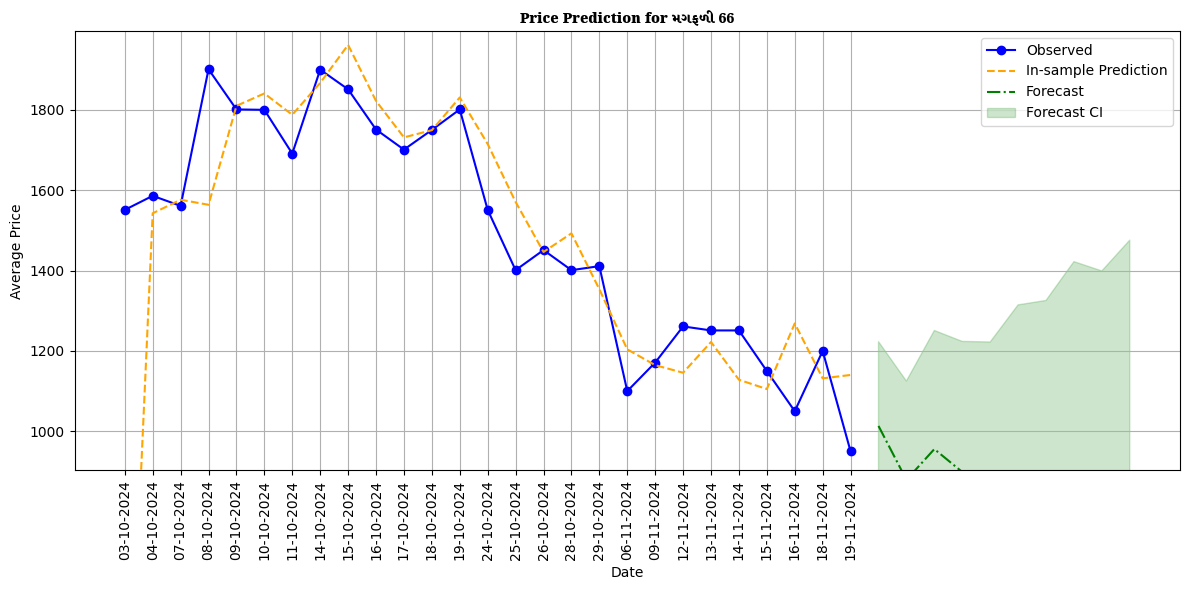

In [26]:
# Retrieve the model
product_name = "મગફળી 66"  # Example product to evaluate
product_data = data[data["Item Name"] == product_name]
print(product_data.shape[0])
hashed_name = safe_filename(product_name)
model_filename = os.path.join(save_dir, f"arima_model_{hashed_name}.pkl")

# Check if any data exists for the selected commodity
if product_data.empty:
  print(f"No data found for the commodity: {product_name}")

else:
  # Extract the 'Average Price' column for the selected commodity
  price_data = product_data['Average Price']

  # Plot the raw price data for the selected commodity
  plt.figure(figsize=(12, 6))
  plt.plot(price_data.index, price_data, label=f'Prices', marker='o', linestyle='-')
  plt.title(f'Price Trend for {product_name}', fontproperties=guj_fonts)
  plt.xlabel('Date')
  plt.ylabel('Average Price')
  plt.xticks(rotation=90)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

if os.path.exists(model_filename):
  
  print(f"Model for {product_name} loaded successfully.")
  loaded_model = joblib.load(model_filename)
  print(loaded_model.summary())
    
  # Step 6: In-sample Predictions
  pred = loaded_model.get_prediction(start=0, end=len(price_data)-1)
  pred_mean = pred.predicted_mean
  pred_ci = pred.conf_int()
    
  # Step 7: Forecast Future Prices
  forecast_steps = 10
  forecast = loaded_model.get_forecast(steps=forecast_steps)
  forecast_mean = forecast.predicted_mean
  forecast_ci = forecast.conf_int()
    
  # Step 8: Plot the Results with Detailed Y-Axis (Zoomed-In)
  plt.figure(figsize=(12, 6))

  # # Plot observed prices
  plt.plot(price_data.index, price_data, label='Observed', marker='o', linestyle='-', color='blue')

  # # Plot in-sample predictions
  plt.plot(pred_mean.index, pred_mean, label='In-sample Prediction', color='orange', linestyle='--')

  # # Plot forecasted prices
  plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green', linestyle='-.')

  # # Add confidence intervals for forecasts
  plt.fill_between(forecast_ci.index,
                  forecast_ci.iloc[:, 0],
                  forecast_ci.iloc[:, 1], color='green', alpha=0.2, label='Forecast CI')

  # # Adjust the y-axis range based on observed and forecasted prices
  plt.ylim(price_data.min() * 0.95, price_data.max() * 1.05)

  # # Graph labels and legend
  plt.title(f'Price Prediction for {product_name}', fontproperties=guj_fonts)
  plt.xlabel('Date')
  plt.ylabel('Average Price')
  plt.xticks(rotation=90)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()
else:
  print(f"Model for {product_name} not found.")


# source .venv/Scripts/activate
to run in git bash